# <b>EDA : Programming Club 2023 General Members Dataset<b>

# <b>Introduction<b>
This project aims to showing attributes of registered general members of "programming Club,Dept. of Statistics,University of Chittagong.

# <b>Import packages<b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <b>Data<b>

In [3]:
members_data = pd.read_csv(r"C:\Users\Administrator\Desktop\Dream with python\PROJECT\pcmembers_2023.csv")

In [4]:
members_data

,Session,Year,Programming Exp,Laptop,Blood Group,DataCamp Granted Date,2023 Contest Perticipated,SIM
0,2021-2022,1st year,Yes,Yes - Laptop,A+,No,NaN,GP
1,2021-2022,1st year,No,Yes - Laptop,A+,08/03/2023,NaN,Airtel
2,2020-2021,2nd year,Yes,Yes - Laptop,AB+,12/04/2023,NaN,GP
3,2020-2021,2nd year,No,Yes - Laptop,O+,18/02/2023,Yes,Robi
4,2018-2019,4th year,Yes,Yes - Laptop,A+,No,NaN,Robi
...,...,...,...,...,...,...,...,...
150,2021-2022,1st year,No,Yes - Laptop,B+,No,NaN,Blink
151,2019-2020,3rd year,Yes,Yes - Laptop,B+,08/03/2023,NaN,Robi
152,2020-2021,2nd year,Yes,Yes - Laptop,NaN,No,NaN,GP
153,2020-2021,2nd year,No,No - But planning to buy,NaN,No,NaN,Robi


# <b>Data Cleaning & Transformation<b>

In [5]:
members_data.dtypes

Session                      object
Year                         object
Programming Exp              object
Laptop                       object
Blood Group                  object
DataCamp Granted Date        object
2023 Contest Perticipated    object
SIM                          object
dtype: object

In [6]:
members_data.isnull().sum()

Session                        0
Year                           0
Programming Exp                0
Laptop                         0
Blood Group                   30
DataCamp Granted Date         24
2023 Contest Perticipated    144
SIM                            1
dtype: int64

In [7]:
members_data['Blood Group'].value_counts()

Blood Group
A+         39
O+         39
B+         32
AB+        10
B (+ve)     1
O(+)        1
A-          1
A +(ve)     1
O-          1
Name: count, dtype: int64

In [8]:
members_data.replace('B (+ve)','B+',inplace=True)
members_data.replace('A +(ve)','A+',inplace=True)
members_data.replace('O(+)','O+',inplace=True)

In [9]:
members_data['Blood Group'].value_counts()

Blood Group
A+     40
O+     40
B+     33
AB+    10
A-      1
O-      1
Name: count, dtype: int64

In [10]:
members_data['Blood Group'].replace(np.nan,'Missing Blood Group',inplace=True)

In [11]:
members_data['2023 Contest Perticipated'].replace(np.nan,'No',inplace=True)

In [12]:
members_data['2023 Contest Perticipated']

0       No
1       No
2       No
3      Yes
4       No
      ... 
150     No
151     No
152     No
153     No
154     No
Name: 2023 Contest Perticipated, Length: 155, dtype: object

In [13]:
members_data['SIM'].ffill(inplace=True)

In [14]:
#members_data['DataCamp Granted Date'].replace('No','Not Granted DataCamp',inplace=True)

In [15]:
members_data['DataCamp Granted Date']

0              No
1      08/03/2023
2      12/04/2023
3      18/02/2023
4              No
          ...    
150            No
151    08/03/2023
152            No
153            No
154            No
Name: DataCamp Granted Date, Length: 155, dtype: object

In [16]:
members_data['DataCamp Granted Date'] = pd.to_datetime(members_data['DataCamp Granted Date'],format='%d/%m/%Y',errors='coerce')

In [17]:
members_data['DataCamp Granted Date'].replace(np.nan,'Not Granted by DataCamp',inplace=True)

In [18]:
members_data['DataCamp Granted Date']

0      Not Granted by DataCamp
1          2023-03-08 00:00:00
2          2023-04-12 00:00:00
3          2023-02-18 00:00:00
4      Not Granted by DataCamp
                ...           
150    Not Granted by DataCamp
151        2023-03-08 00:00:00
152    Not Granted by DataCamp
153    Not Granted by DataCamp
154    Not Granted by DataCamp
Name: DataCamp Granted Date, Length: 155, dtype: object

In [19]:
members_data.isnull().sum()

Session                      0
Year                         0
Programming Exp              0
Laptop                       0
Blood Group                  0
DataCamp Granted Date        0
2023 Contest Perticipated    0
SIM                          0
dtype: int64

In [20]:
members_data.head()

,Session,Year,Programming Exp,Laptop,Blood Group,DataCamp Granted Date,2023 Contest Perticipated,SIM
0,2021-2022,1st year,Yes,Yes - Laptop,A+,Not Granted by DataCamp,No,GP
1,2021-2022,1st year,No,Yes - Laptop,A+,2023-03-08 00:00:00,No,Airtel
2,2020-2021,2nd year,Yes,Yes - Laptop,AB+,2023-04-12 00:00:00,No,GP
3,2020-2021,2nd year,No,Yes - Laptop,O+,2023-02-18 00:00:00,Yes,Robi
4,2018-2019,4th year,Yes,Yes - Laptop,A+,Not Granted by DataCamp,No,Robi


In [21]:
members_data['Year'].value_counts()

Year
2nd year    66
1st year    49
4th year    19
3rd year    14
Master's     7
Name: count, dtype: int64

In [22]:
members_data['Session'].value_counts()

Session
2020-2021    64
2021-2022    51
2018-2019    18
2019-2020    13
2017-2018     9
Name: count, dtype: int64

In [23]:
members_data.rename(columns={'Laptop':'Computer'},inplace=True)

In [24]:
members_data['Computer'].value_counts()

Computer
Yes - Laptop                91
No - But planning to buy    35
Yes - Desktop               13
No                          10
No - But I can manage        6
Name: count, dtype: int64

# <b>Data Representation<b>

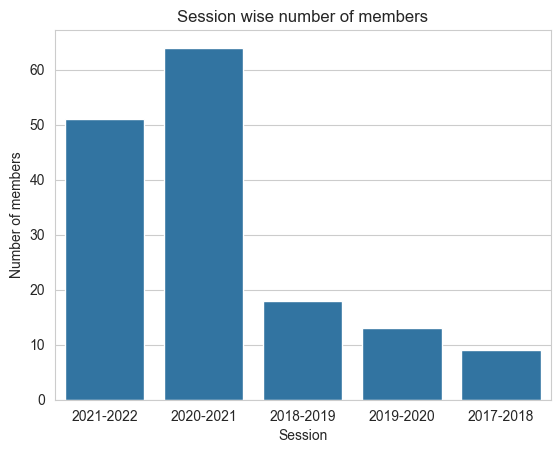

In [104]:
sns.set_style('whitegrid')
y=sns.countplot(x='Session',data=members_data)
y.set_xticks(y.get_xticks())
plt.title('Session wise number of members')
plt.ylabel('Number of members')
plt.show()

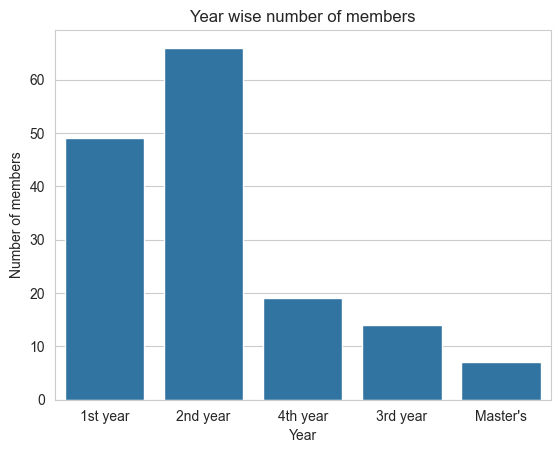

In [105]:
y=sns.countplot(x='Year',data=members_data)
y.set_xticks(y.get_xticks())
plt.title('Year wise number of members')
plt.ylabel('Number of members')
plt.show()

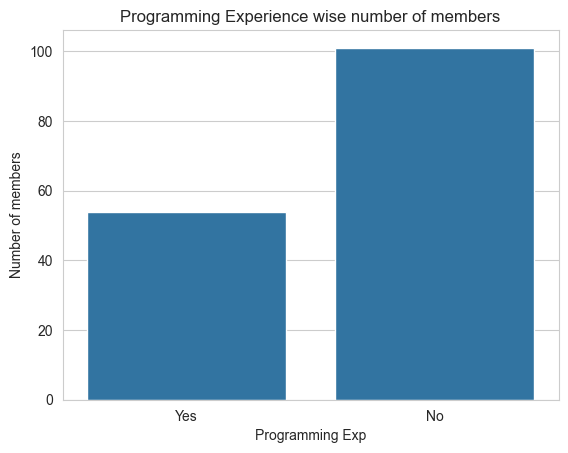

In [107]:
sns.countplot(x='Programming Exp',data=members_data)
plt.title('Programming Experience wise number of members')
plt.ylabel('Number of members')
plt.show()

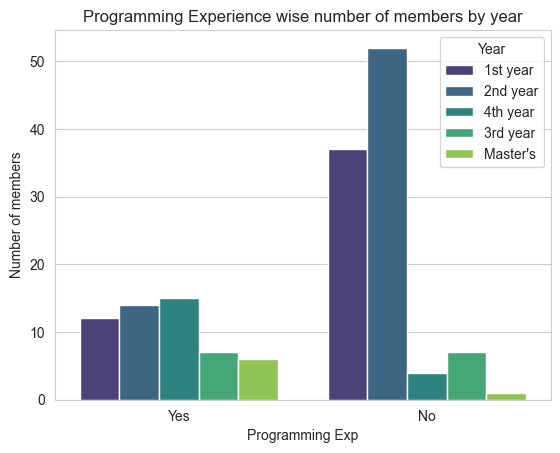

In [108]:
sns.countplot(x='Programming Exp',hue='Year',data=members_data,palette='viridis')
plt.title('Programming Experience wise number of members by year')
plt.ylabel('Number of members')
plt.show()

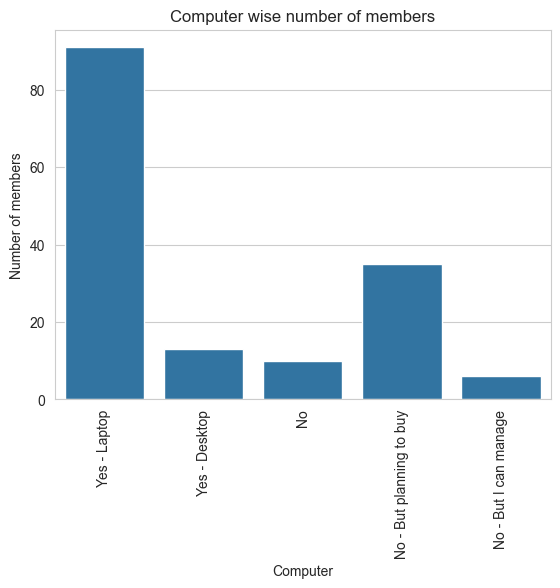

In [109]:
ordered=['Yes - Laptop','Yes - Desktop','No','No - But planning to buy','No - But I can manage']
s=sns.countplot(x='Computer',data=members_data,order=ordered)
s.set_xticks(s.get_xticks())
plt.title('Computer wise number of members')
plt.ylabel('Number of members')
plt.xticks(rotation=90)
plt.show()

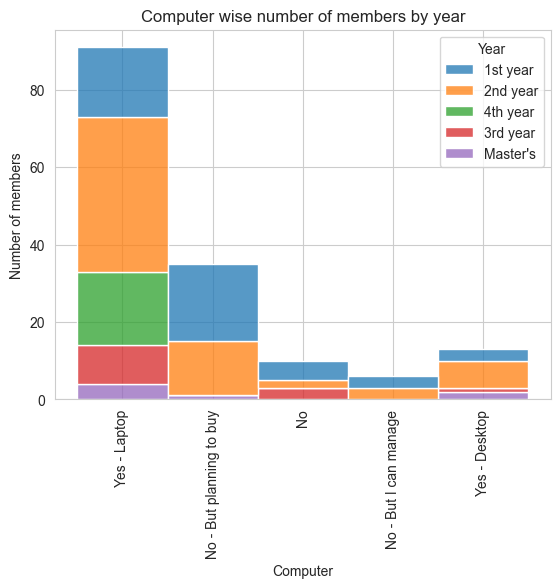

In [110]:
b=sns.histplot(x='Computer',hue='Year',data=members_data,multiple='stack')
b.set_xticks(b.get_xticks())
plt.title('Computer wise number of members by year')
plt.ylabel('Number of members')
plt.xticks(rotation=90)
plt.show()

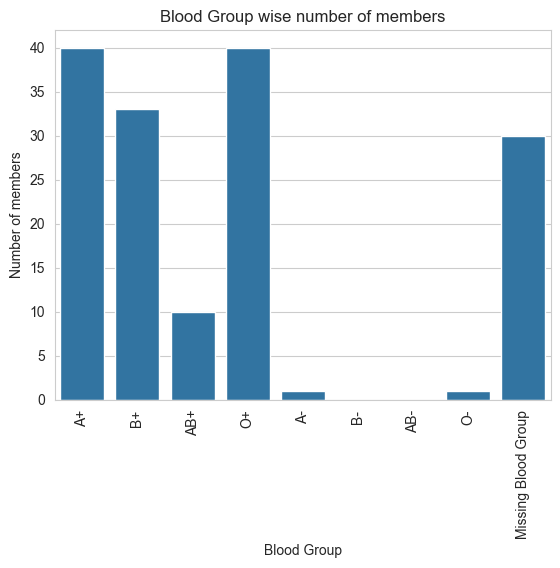

In [111]:
ordered_blood=['A+','B+','AB+','O+','A-','B-','AB-','O-','Missing Blood Group']
y=sns.countplot(x='Blood Group',data=members_data,order=ordered_blood)
y.set_xticks(y.get_xticks())
plt.title('Blood Group wise number of members')
plt.ylabel('Number of members')
plt.xticks(rotation=90)
plt.show()

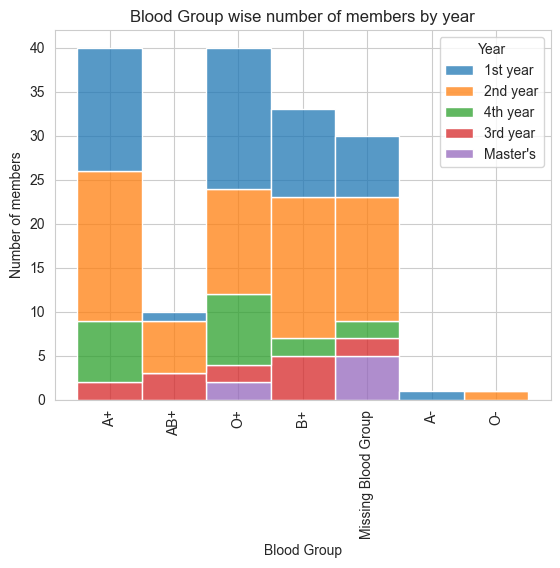

In [115]:
bg=sns.histplot(x='Blood Group',hue='Year',data=members_data,multiple='stack')
bg.set_xticks(bg.get_xticks())
plt.title('Blood Group wise number of members by year')
plt.ylabel('Number of members')
plt.xticks(rotation=90)
plt.show()

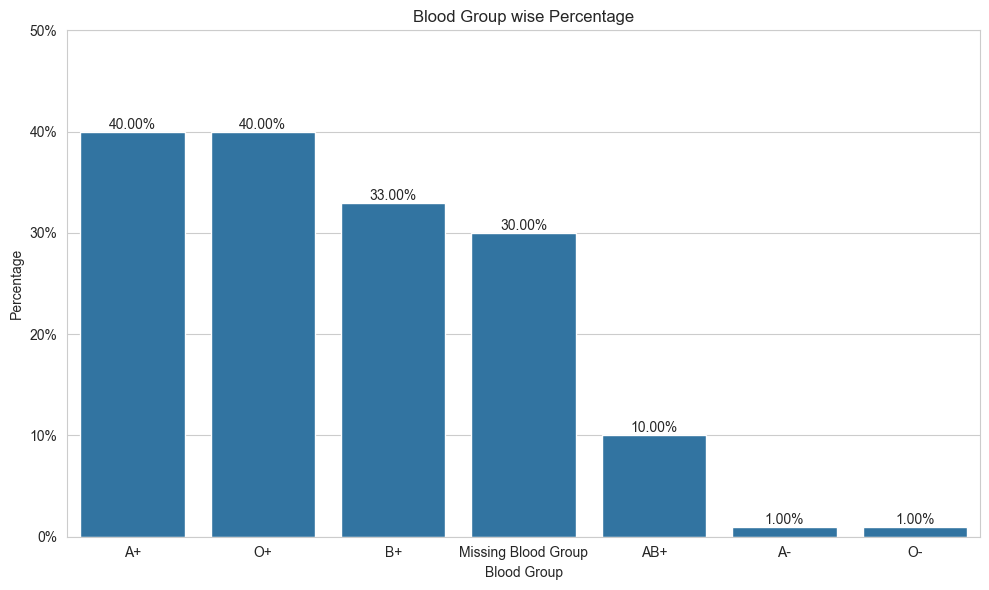

In [133]:
counts = members_data['Blood Group'].value_counts()
percentages = (counts / counts.sum()) * 100
plt.figure(figsize=(10, 6))
c=sns.countplot(data=members_data, x='Blood Group', order=counts.index)
plt.title('Blood Group wise Percentage')
plt.ylabel('Percentage')
c.set_yticks(range(0, 60, 10))
c.set_yticklabels([f'{i}%' for i in range(0, 60, 10)])
for i in c.patches:
 height, width = i.get_height(), i.get_x() + i.get_width() / 2
 c.annotate(f'{height:.2f}%', (width, height), ha='center', va='bottom')
plt.tight_layout()
plt.show()

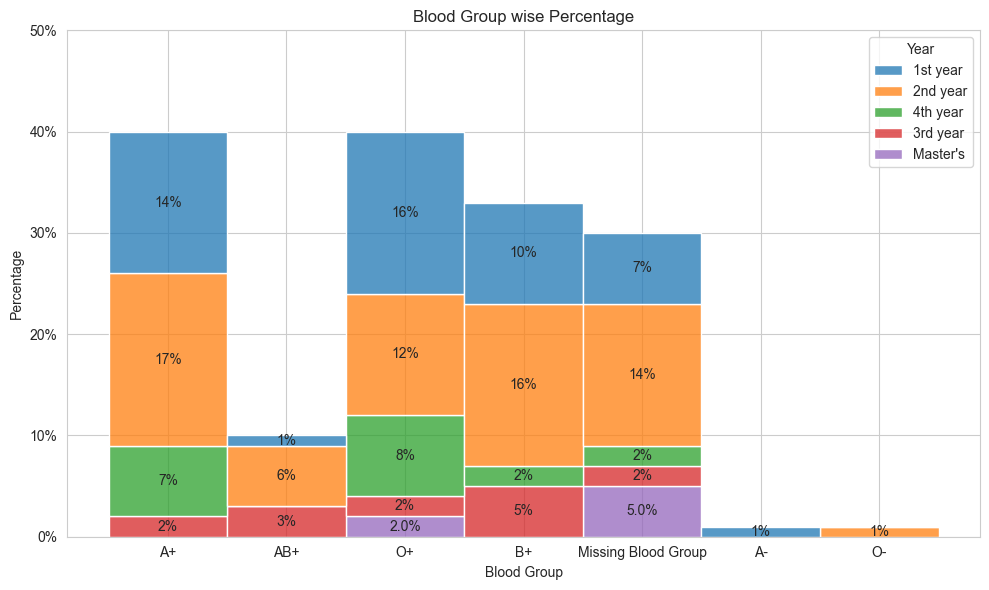

In [136]:
counts = members_data['Blood Group'].value_counts()
percentages = (counts / counts.sum()) * 100
plt.figure(figsize=(10, 6))
c=sns.histplot(data=members_data, x='Blood Group', hue='Year', multiple='stack')
plt.title('Blood Group wise Percentage')
plt.ylabel('Percentage')
c.set_yticks(range(0, 60, 10))
c.set_yticklabels([f'{i}%' for i in range(0, 60, 10)])
for p in c.patches:
 width, height = p.get_width(), p.get_height()
 x, y = p.get_xy()
 c.annotate(f'{round(height, 2)}%' if height != 0 else '', (x + width/2, y + height/2), ha='center', va='center')
plt.tight_layout()
plt.show()

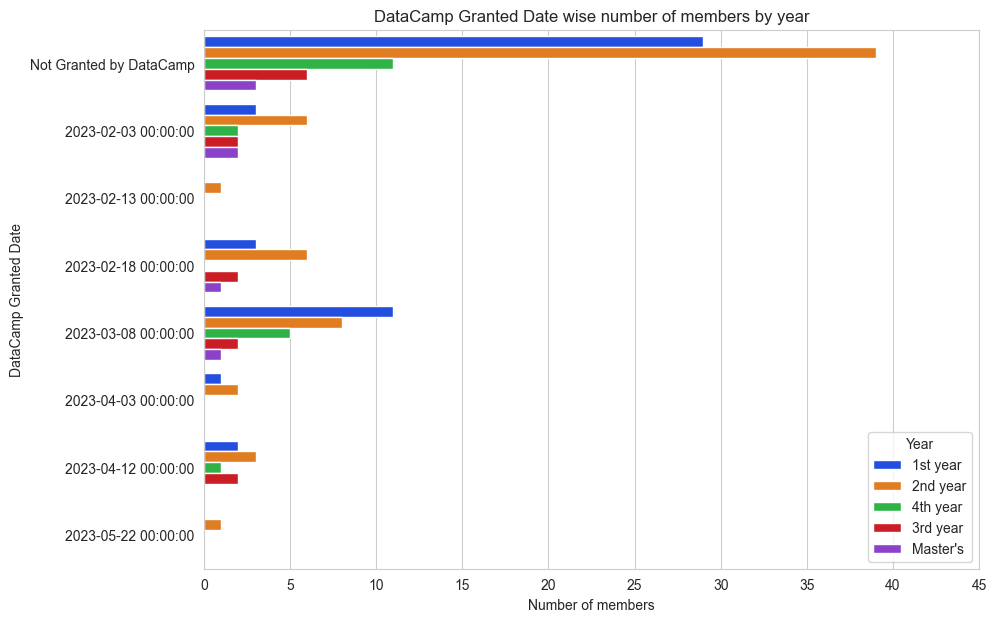

In [117]:
plt.figure(figsize=(10, 7))
ordered_date=['Not Granted by DataCamp','2023-02-03 00:00:00','2023-02-13 00:00:00','2023-02-18 00:00:00','2023-03-08 00:00:00','2023-04-03 00:00:00','2023-04-12 00:00:00','2023-05-22 00:00:00']
d=sns.countplot(y='DataCamp Granted Date',hue='Year',data=members_data,palette='bright',order=ordered_date)
d.set_xticks(d.get_xticks())
plt.title('DataCamp Granted Date wise number of members by year')
plt.xlabel('Number of members')
plt.show()

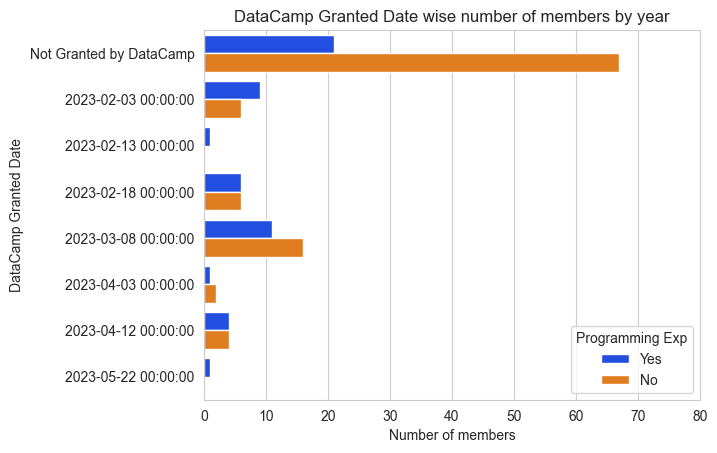

In [120]:
d=sns.countplot(y='DataCamp Granted Date',hue='Programming Exp',data=members_data,palette='bright',order=ordered_date)
d.set_xticks(d.get_xticks())
plt.title('DataCamp Granted Date wise number of members by year')
plt.xlabel('Number of members')
plt.show()

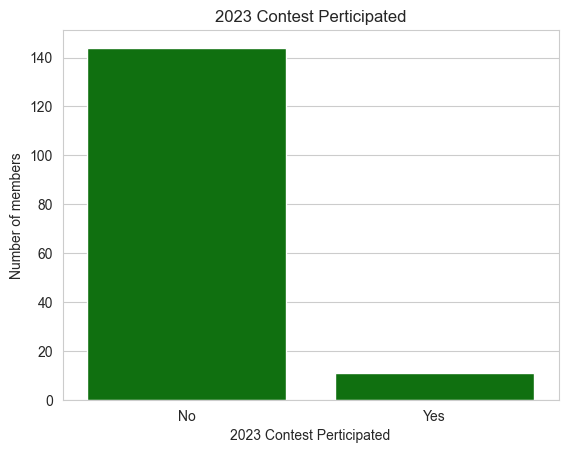

In [121]:
sns.countplot(x='2023 Contest Perticipated',data=members_data,color='green')
plt.title('2023 Contest Perticipated')
plt.ylabel('Number of members')
plt.show()

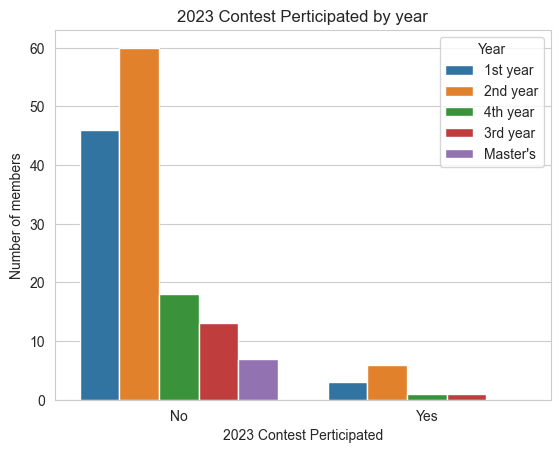

In [122]:
sns.countplot(x='2023 Contest Perticipated',hue='Year',data=members_data)
plt.title('2023 Contest Perticipated by year')
plt.ylabel('Number of members')
plt.show()

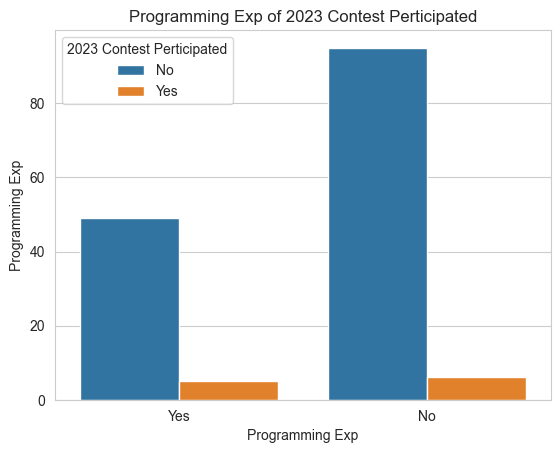

In [124]:
sns.countplot(x='Programming Exp',hue='2023 Contest Perticipated',data=members_data)
plt.title('Programming Exp of 2023 Contest Perticipated')
plt.ylabel('Programming Exp')
plt.show()

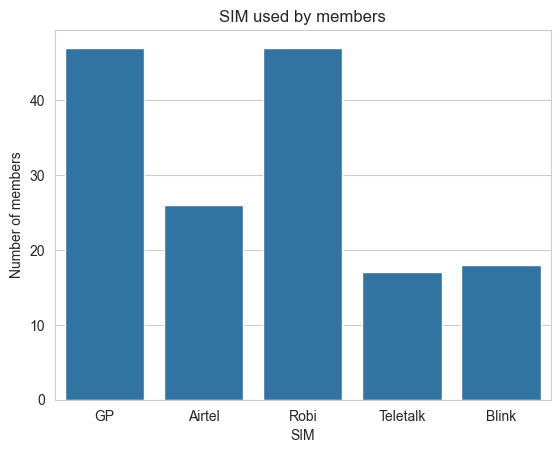

In [126]:
sns.countplot(x='SIM',data=members_data)
plt.title('SIM used by members')
plt.ylabel('Number of members')
plt.show()

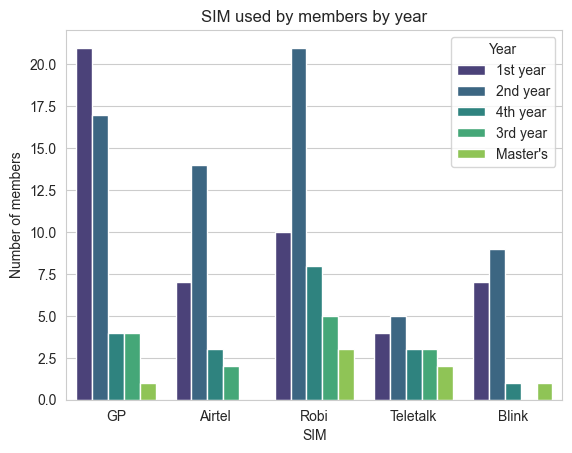

In [127]:
sns.countplot(x='SIM',hue='Year',data=members_data,palette='viridis')
plt.title('SIM used by members by year')
plt.ylabel('Number of members')
plt.show()